In [7]:
#importing the necessairy libraries
import pandas as pd    #data management library
import numpy as np     #useful also to manage numbers and data
import sklearn         #has machine laerning models
import matplotlib.pyplot as plt    #data visualization library
import seaborn as sns              #same

from imblearn.over_sampling import SMOTE    #helps with imbalanced observations
from sklearn.model_selection import train_test_split    #a necessairy step in machine learning
from sklearn import metrics

<p style="font-size:160%;font-family:source+scan+pro;color:navy">
    <strong>
        1. Reading the data set
    </strong>

In [120]:
#reading the data set into a pandas data frame
#note: we had to seperate the data by delimiter ;
df = pd.read_csv('data/bank-full.csv',delimiter=';')
#a nice read into the number columns and rows in our data set
#and a quick glance into the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<p
   style="font-size:160%;font-family:source+scan+pro;color:navy">
    <strong>
        2. Data Exploration
    </strong>
</p>
<p
   style="font-size:100%;font-family:source+scan+pro;color:black">
    Take a look at figure 1 down there, it shows you the number of clients who subscribed to the service after being solicted by the bank. As it is clearly shown, the number of people who subscribed (positive outcome) is about 9 times less than that of those who did not subscribe. So, if we use this data set as it is to train the model, it is going to see much more negative outcomes than positive outcomes, which isn't fair. We call this an imblanaced data set. Keep that in mind because we are going to talk about solving for this later on. 
</p>

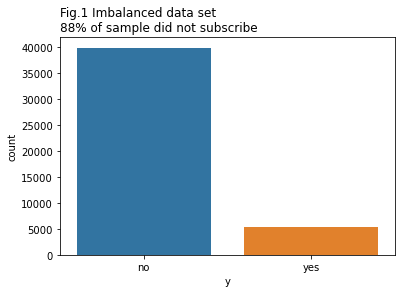

In [121]:
#column 'y' contains the outcome of the call, whether the client purchased the service or not.
#naming the target column 'y' is a convention in the machine learning community
df['y'].value_counts()
sns.countplot(data=df,x='y')
plt.title('Fig.1 Imbalanced data set \n88% of sample did not subscribe',loc='left');

<p style="font-size:160%;font-family:source+scan+pro;color:navy">
    <strong>
        3. Building the Model
        <strong/>
        <p/>

In [122]:
#1. changing the target variable to "dummy"
df['y']= np.where(df['y']=='yes',1,0)

In [130]:
#2. checking the sample class balance
print(df['y'].value_counts()/df['y'].count())
print(df['y'].value_counts())

0    0.883015
1    0.116985
Name: y, dtype: float64
0    39922
1     5289
Name: y, dtype: int64


In [132]:
# 3. Categorical variables to dummy
# 3.1 assigning categorical variables to a list
categorical_features = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'day', 'month','poutcome']

In [134]:
#3.2 create a copy of the original data frame and alias it as dummy
# this step is made to maintain a clean structure
dummy_df = df
print('number of columns in original data frame:',dummy_df.shape[1])
#3.3 

number of columns in original data frame: 17
